# In this project, you will learn practically how to choose the best features that help us to identify Medical Diagnosis of diabetes using Data analysis & data visualization and then using these features in logistic regression  , SVM  and KNN models .



We will go through 5 tasks to implement our project:

Task 1: Importing libraries and Exploring the Dataset.

Task 2: Checking missing values.

Task 3: Creating visual methods to analyze the data.

Task 4: make logistic regression model

Task 5: make Support vector machine classification model

Task 6: make KNN  model

# Task 1: Importing libraries and Exploring the Dataset.


In [1]:
import numpy as np     # linear algebra
import pandas as pd     # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()        #setting the default seaborn style for our plots
from sklearn.preprocessing import StandardScaler    #normalization
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression  #logistic regresstion model
from sklearn.svm import SVC                    # Support Vector machine mpodel
from sklearn.neighbors import KNeighborsClassifier  #KNN model
from sklearn.metrics import accuracy_score, classification_report ,confusion_matrix

In [2]:
column_names = ["pregnancies", "glucose", "bpressure", "skinfold", "insulin", "bmi", "pedigree", "age", "class"]
medical_df=pd.read_csv('data.csv',names=column_names)   #importing the dataset
medical_df.head()   #checking the head of the data


,pregnancies,glucose,bpressure,skinfold,insulin,bmi,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# About this file
Pregnancies: Number of times pregnant

Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

BloodPressure: Diastolic blood pressure (mm Hg)

SkinThickness: Triceps skin fold thickness (mm)

Insulin: 2-Hour serum insulin (mu U/ml)

BMI: Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction: Diabetes pedigree function

Age: Age (years)

Outcome: Class variable (0 or 1)

# Task 2: Checking missing values.


In [3]:
medical_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   bpressure    768 non-null    int64  
 3   skinfold     768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   pedigree     768 non-null    float64
 7   age          768 non-null    int64  
 8   class        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Expected output:

             1-The data should consist of 768 data record with 9 attributes. 7 integer type, 2 float type .
             2- no missing data.

In [4]:
# check the missing data .
medical_df.isna().apply(pd.value_counts)

,pregnancies,glucose,bpressure,skinfold,insulin,bmi,pedigree,age,class
False,768,768,768,768,768,768,768,768,768


Expected output:
                No missing data

# Task 3: Creating visual methods to analyze the data.

In [5]:
medical_df.describe()

,pregnancies,glucose,bpressure,skinfold,insulin,bmi,pedigree,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


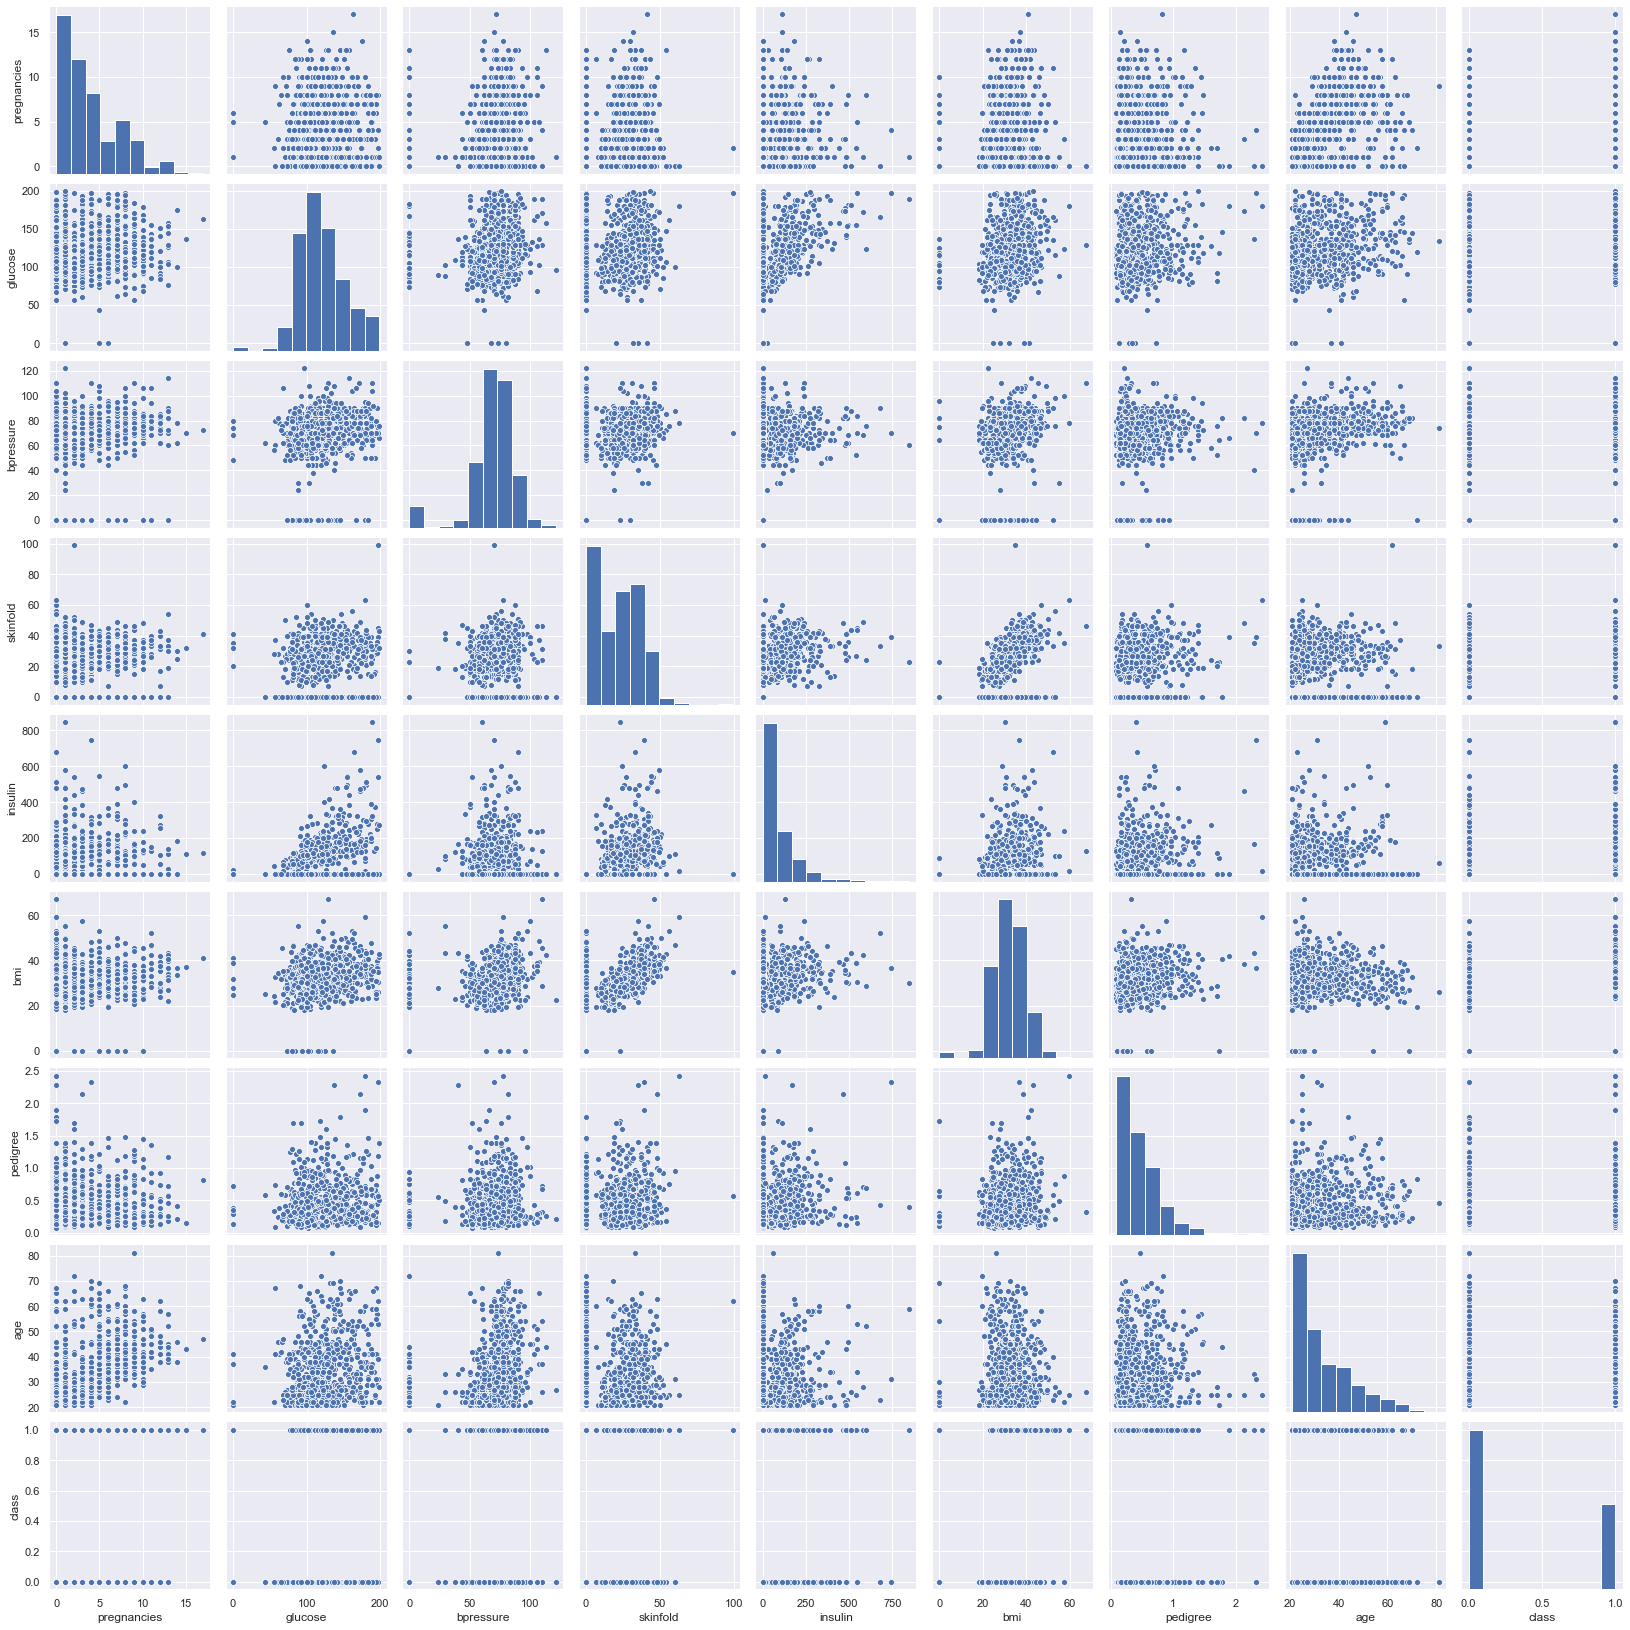

In [6]:
sns.pairplot(medical_df)

this data need to normalize.

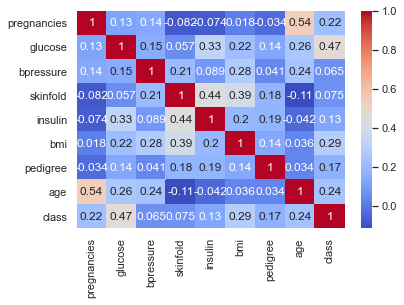

In [7]:
# show the correlation in heatmap.
sns.heatmap(medical_df.corr(),cmap ='coolwarm',annot=True)

In [8]:
x=medical_df[['pregnancies','glucose','bmi','pedigree','age']]            #Extract Features
y=medical_df['class']              #Extract Class Labels
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: class, Length: 768, dtype: int64

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=101)  #Split Dataset



In [10]:
sc=StandardScaler()   #Normalize Features
sc.fit(x_train)
x_train=sc.transform(x_train)

# Task 4: make logistic regression model

In [11]:
# Fitting Logistic Regression to the Training set
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [12]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[  0, 103],
       [  0,  51]], dtype=int64)

In [13]:
cr=classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       103
           1       0.33      1.00      0.50        51

    accuracy                           0.33       154
   macro avg       0.17      0.50      0.25       154
weighted avg       0.11      0.33      0.16       154



C:\Users\Hashooma\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
acc=accuracy_score(y_test, y_pred)
print('accurcy of logistic model: ',acc *100,'%')

accurcy of logistic model:  33.116883116883116 %


# this is underfitting model becouse the complexty of data.






# Task 5: make Support vector machine classification model


In [15]:
clf=SVC(kernel='sigmoid')
clf.fit(x_train,y_train)

SVC(kernel='sigmoid')

In [16]:
y_pred=clf.predict(x_train)
print(accuracy_score(y_train,y_pred))

0.6938110749185668


In [17]:
for k in ('linear','poly','rbf','sigmoid'):
    clf=SVC(kernel=k)
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_train)
    print(k)
    print(accuracy_score(y_train,y_pred))

linear
0.7654723127035831
poly
0.7671009771986971
rbf
0.8013029315960912
sigmoid
0.6938110749185668


In [18]:
from sklearn.model_selection import GridSearchCV  #use GridSearchCV to improve the accuracy of our model.
# defining parameter range 
param_grid = {'C': [0.01, 1, 10, 100],  
              'gamma': [10,1,0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
   
grid = GridSearchCV(SVC(), param_grid, refit = True,verbose = 5,n_jobs=-1) 
   
# fitting the model for grid search 
grid.fit(x_train, y_train) 
 
# print best parameter after tuning 
print(grid.best_params_) 
grid_predictions = grid.predict(x_train) 
   
# print classification report 
print(classification_report(y_train, grid_predictions)) 


Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   18.2s
[Parallel(n_jobs=-1)]: Done  65 tasks      | elapsed:   20.8s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   22.5s finished


{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       397
           1       0.75      0.55      0.64       217

    accuracy                           0.78       614
   macro avg       0.77      0.73      0.74       614
weighted avg       0.77      0.78      0.77       614



In [21]:
clf=SVC(kernel='rbf',C=10,gamma=0.01,)
clf.fit(x_train,y_train)

SVC(C=10, gamma=0.01)

In [22]:
x_test = sc.transform(x_test)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.7922077922077922


# accurcy of SVM is 79%

# Task 6: make KNN  model


In [23]:
 KNN= KNeighborsClassifier(n_neighbors=27)
#Train the model using the train sets
KNN.fit(x_train, y_train) 

KNeighborsClassifier(n_neighbors=27)

In [24]:
y_pred= KNN.predict(x_test) 
print(accuracy_score(y_test,y_pred))

0.7727272727272727


# best wishes